In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.get_dataset_names()
df = sns.load_dataset("diamonds")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Basic plots

## Line  
- Description: Line plots are used to visualize data points connected by straight line segments. They are commonly used to show trends over time or to compare trends between different groups.  

- How to Create: You can create a line plot using the plot() function from Matplotlib.

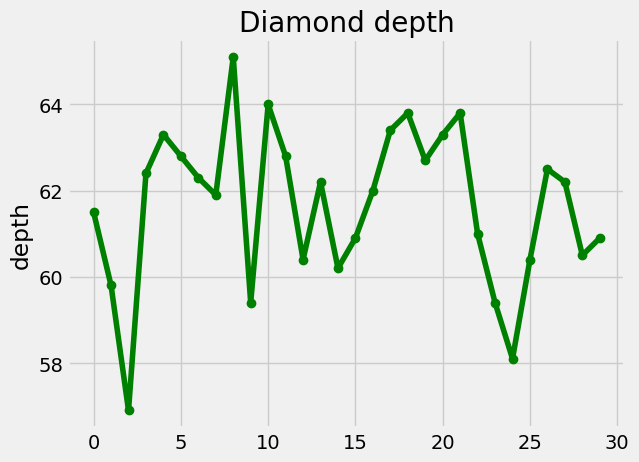

In [ ]:
# matplotlib

plt.style.use('fivethirtyeight')
plt.plot(df["depth"][:30], marker="o", color="green")
plt.ylabel("depth")
plt.title("Diamond depth")

plt.show()

## Bar
- Description: Bar plots are used to compare quantities of different categories. They display data as rectangular bars, where the length of each bar represents the value of a variable.

- How to Create: You can create a bar plot using the bar() or barplot() function from Matplotlib or Seaborn, respectively.

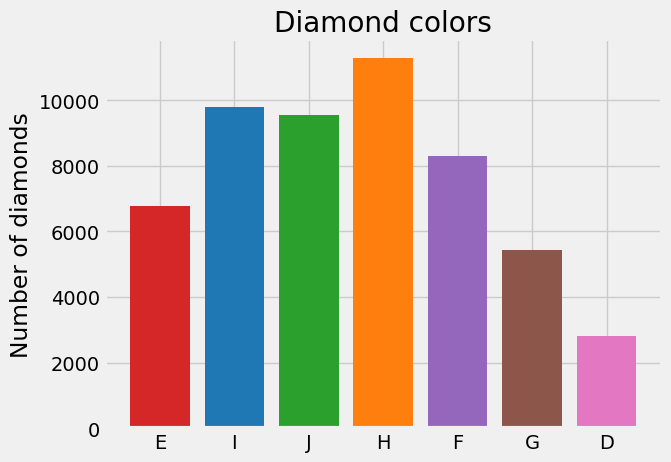

In [ ]:
colors = df["color"].unique()
color_numbers = np.array(df.groupby(["color"]).count()["x"])
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:brown', 'tab:pink']

plt.bar(colors, color_numbers, color = bar_colors)
plt.ylabel("Number of diamonds")
plt.title("Diamond colors")
plt.show()

## Scatter plot
- Description: Scatter plots are used to visualize the relationship between two continuous variables. Each data point is represented as a point on the plot, with its position determined by the values of the two variables.
- How to Create: You can create a scatter plot using the scatter() function from Matplotlib

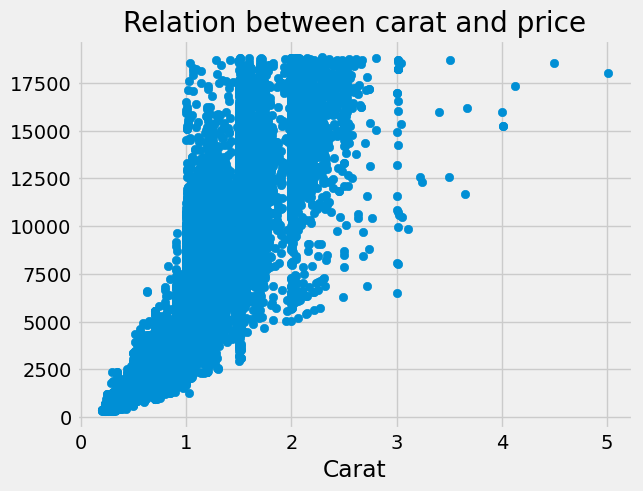

In [ ]:
plt.scatter(df["carat"], df["price"])
plt.xlabel("Price")
plt.xlabel("Carat")
plt.title("Relation between carat and price")

plt.show()

## Pie Chart
- Description: Pie charts are used to represent the proportion of different categories in a dataset. Each category is represented by a slice of the pie, with the size of the slice proportional to the percentage of the whole.
- How to Create: You can create a pie chart using the pie() function from Matplotlib.

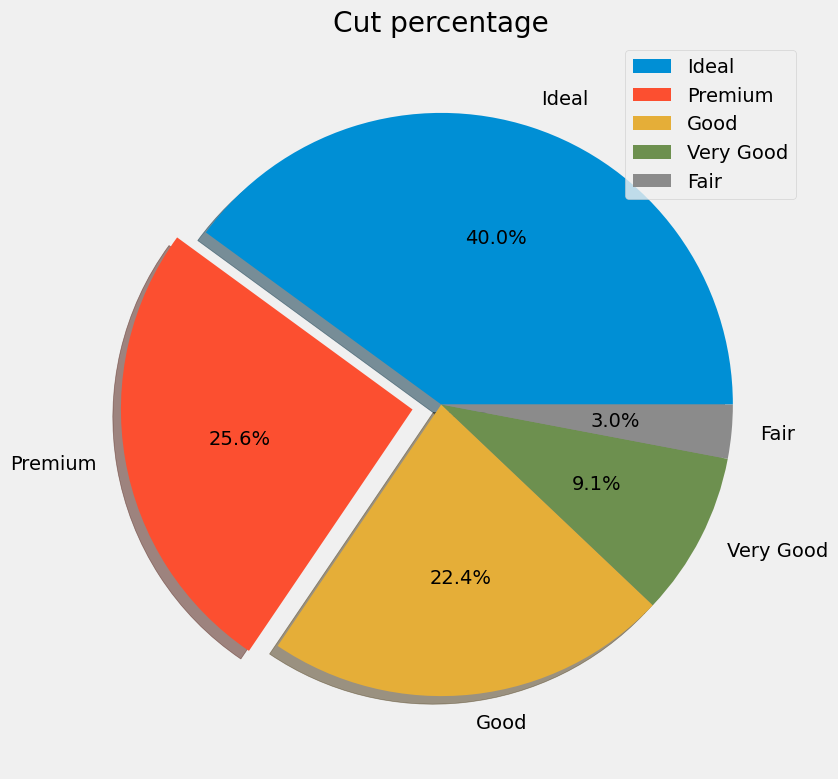

In [ ]:
cut_info = np.array(df.groupby(["cut"]).count()["x"])
cut_names = df["cut"].unique()
explode = (0, 0.1, 0, 0, 0)

plt.figure(figsize=(12, 9))
plt.pie(cut_info, explode=explode, labels = cut_names, autopct='%1.1f%%', shadow=True)
plt.legend()
plt.title("Cut percentage")
plt.show()

# Advanced Plot

## Box plot
- Description: Box plots are used to visualize the distribution of a continuous variable and to identify outliers. They display the median, quartiles, and range of the data.
- How to Create: You can create a box plot using the boxplot() function from Matplotlib or Seaborn.

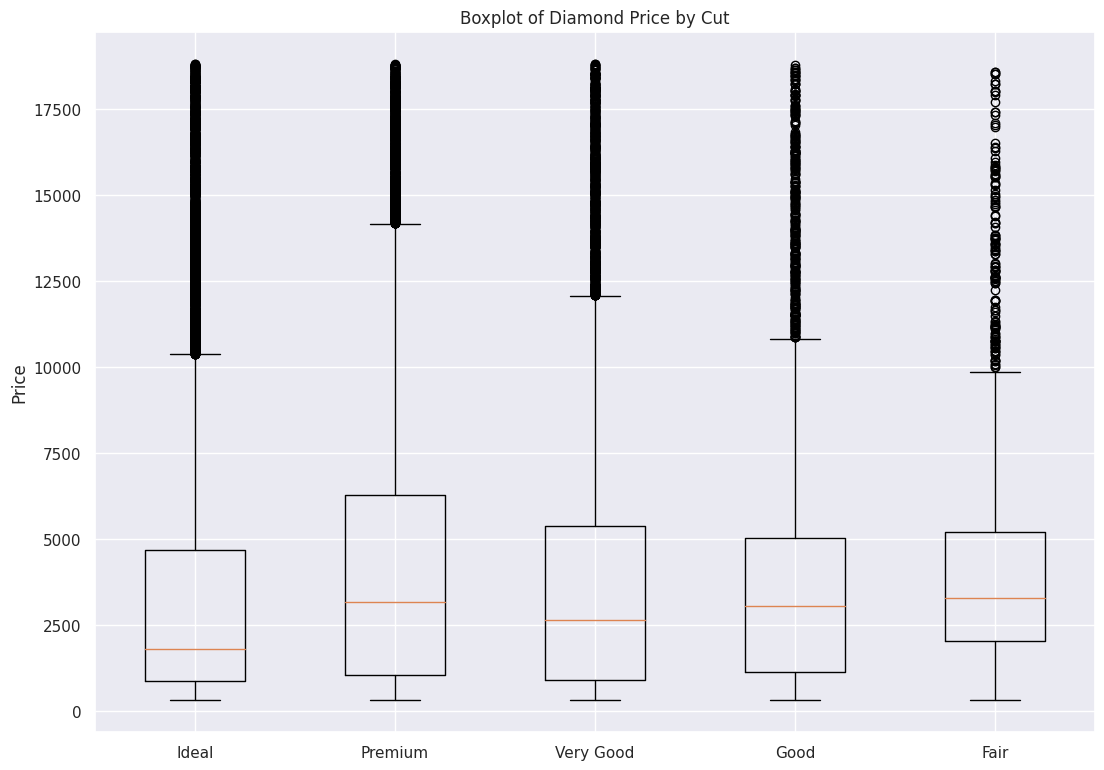

In [96]:
# creating categories of cuts
ideal = df[df["cut"] == "Ideal"]["price"]
premium = df[df["cut"] == "Premium"]["price"]
very_good = df[df["cut"] == "Very Good"]["price"]
good = df[df["cut"] == "Good"]["price"]
fair = df[df["cut"] == "Fair"]["price"]

cuts = [ideal, premium, very_good, good, fair]
cut_labels = ["Ideal", "Premium", "Very Good", "Good", "Fair"]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(cuts)
ax.set_xticklabels(cut_labels)
ax.set_ylabel("Price")
ax.set_title("Boxplot of Diamond Price by Cut")
plt.show()

## 2D Heatmap
- Description: Heatmaps are used to visualize the intensity of values in a matrix. They are commonly used in fields like data analysis and image processing to represent data density.
- How to Create: You can create a heatmap using the imshow() function from Matplotlib or the heatmap() function from Seaborn.

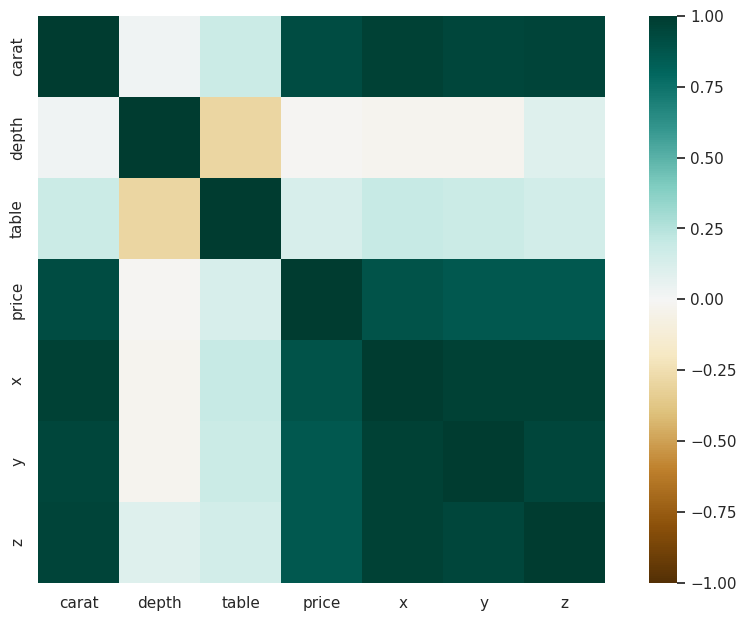

In [94]:
#before creating heatmap we chould make a corr table
corr_matrix = df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']].corr()

sns.set(rc={'figure.figsize':(10, 7)})
palette = "BrBG"

# Create the heatmap with the chosen palette
axis_corr = sns.heatmap(corr_matrix, vmin=-1, vmax=1, center=0, square=True, cmap=palette)
plt.show()

## Stacked bar
- Description: Stacked bar plots are used to show how a larger category is divided into smaller subcategories and how their proportions change over another variable.
- How to Create: You can create a stacked bar plot using the bar() or barplot() function from Matplotlib or Seaborn, respectively, and setting the bottom parameter for each subsequent bar.

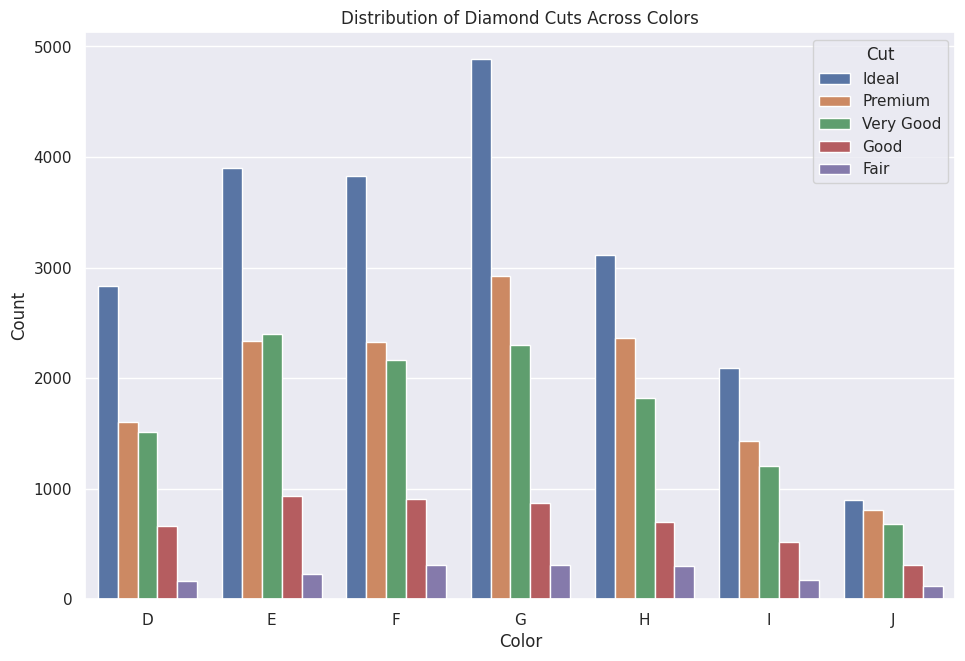

In [98]:
sns.countplot(data=df, x='color', hue='cut')

plt.title('Distribution of Diamond Cuts Across Colors')
plt.xlabel('Color')
plt.ylabel('Count')
plt.legend(title='Cut')
plt.show()

## Gannt chart
- Description: Gantt charts are used to visualize timelines and schedules. They display tasks or activities along a timeline, showing their start and end times.
- How to Create: You can create a Gantt chart using the bar() function from Matplotlib, plotting horizontal bars with specified start and end times for each task.

<ipython-input-99-d8c1768ad7a0>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=diamonds_sorted, x='price', y='cut', color='b', ci=None)


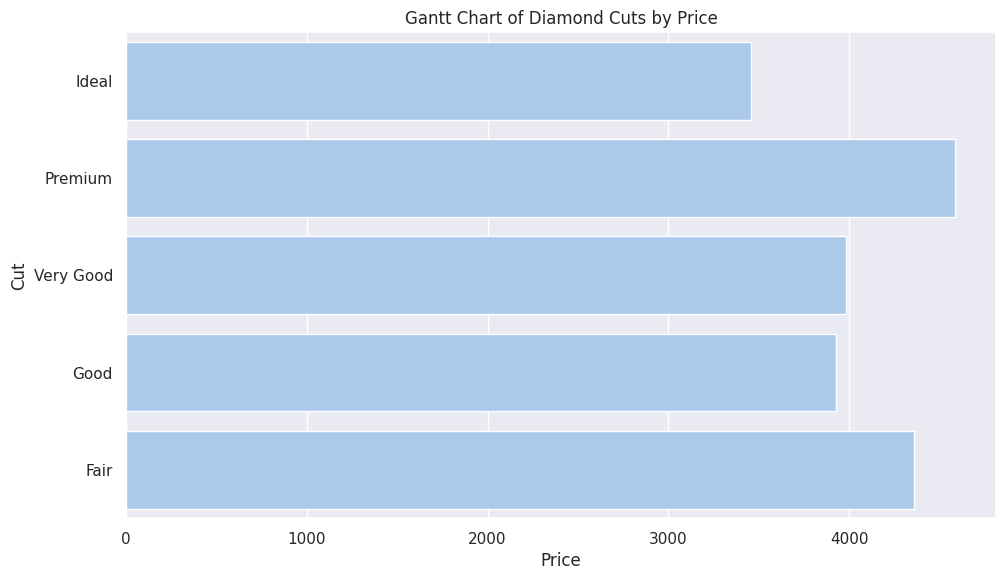

In [99]:
diamonds_sorted = df.sort_values(by='price')

# Creating a Gantt chart
plt.figure(figsize=(10, 6))
sns.set_color_codes("pastel")
sns.barplot(data=diamonds_sorted, x='price', y='cut', color='b', ci=None)

plt.title('Gantt Chart of Diamond Cuts by Price')
plt.xlabel('Price')
plt.ylabel('Cut')
plt.show()

## Polar chart
- Description: Polar charts (also known as radar or spider charts) are used to visualize multivariate data with each variable represented along a separate axis emanating from the center of the chart.
- How to Create: You can create a polar chart using the polar() function from Matplotlib, plotting each variable as a line or marker on the chart with angles corresponding to each axis.

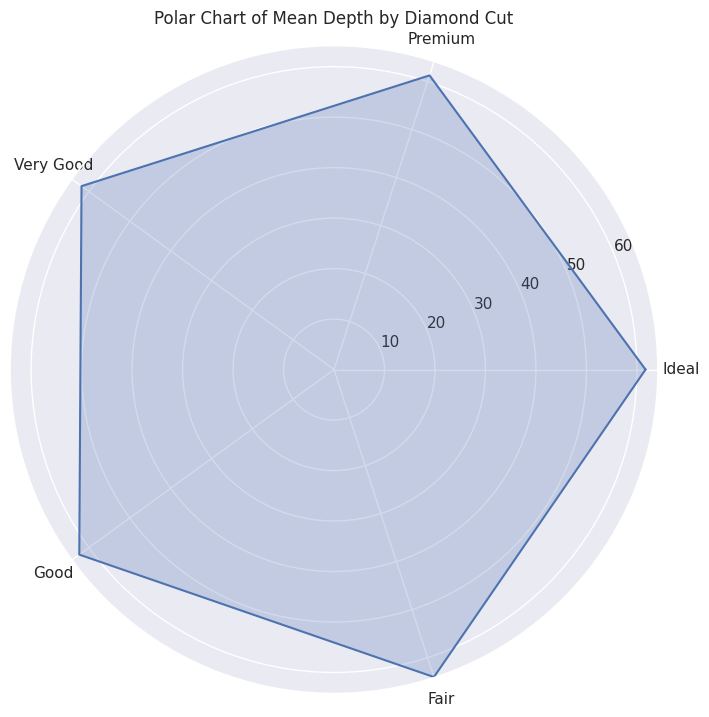

In [100]:
variable = 'depth'
grouped_diamonds = df.groupby('cut')[variable].mean().reset_index()

# number of cuts
num_categories = len(grouped_diamonds)

# creating a list of categories and corresponding values
categories = grouped_diamonds['cut']
values = grouped_diamonds[variable]

# calculating the angle for each category
angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()

# making the plot close to a circle
values = np.concatenate((values,[values[0]]))
angles += angles[:1]

plt.figure(figsize=(8, 8))
plt.polar(angles, values)
plt.fill(angles, values, alpha=0.25)
plt.title('Polar Chart of Mean Depth by Diamond Cut')
plt.xticks(angles[:-1], categories)
plt.show()